In [1]:
import sys
sys.path.append("../")

import os
import cv2
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import albumentations as A
import matplotlib.pyplot as plt

from utils.plot_util import visualize_class_distribution, visualize_class_images

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.12 (you have 1.4.11). Upgrade using: pip install --upgrade albumentations


# 데이터 로드

In [2]:
data_path = "../dataset"
image_path = f"{data_path}/train"

train_df = pd.read_csv(f"{data_path}/train.csv")
meta_df = pd.read_csv(f"{data_path}/meta.csv")

In [3]:
display(train_df.shape)
display(train_df.head())

(1570, 2)

ID  target
0  002f99746285dfdd.jpg      16
1  008ccd231e1fea5d.jpg      10
2  008f5911bfda7695.jpg      10
3  009235e4c9c07af5.jpg       4
4  00b2f44967580c74.jpg      16

In [4]:
display(meta_df.shape)
display(meta_df['class_name'].unique())

(17, 2)

array(['account_number',
       'application_for_payment_of_pregnancy_medical_expenses',
       'car_dashboard', 'confirmation_of_admission_and_discharge',
       'diagnosis', 'driver_lisence', 'medical_bill_receipts',
       'medical_outpatient_certificate', 'national_id_card', 'passport',
       'payment_confirmation', 'pharmaceutical_receipt', 'prescription',
       'resume', 'statement_of_opinion',
       'vehicle_registration_certificate', 'vehicle_registration_plate'],
      dtype=object)

In [5]:
test_files = os.listdir(f"{data_path}/test")
print(len(test_files))

3140


# 데이터에 적용된 Augmentation 분석

- Rotate
- Blur
- White Padding
- HFlip, VFlip

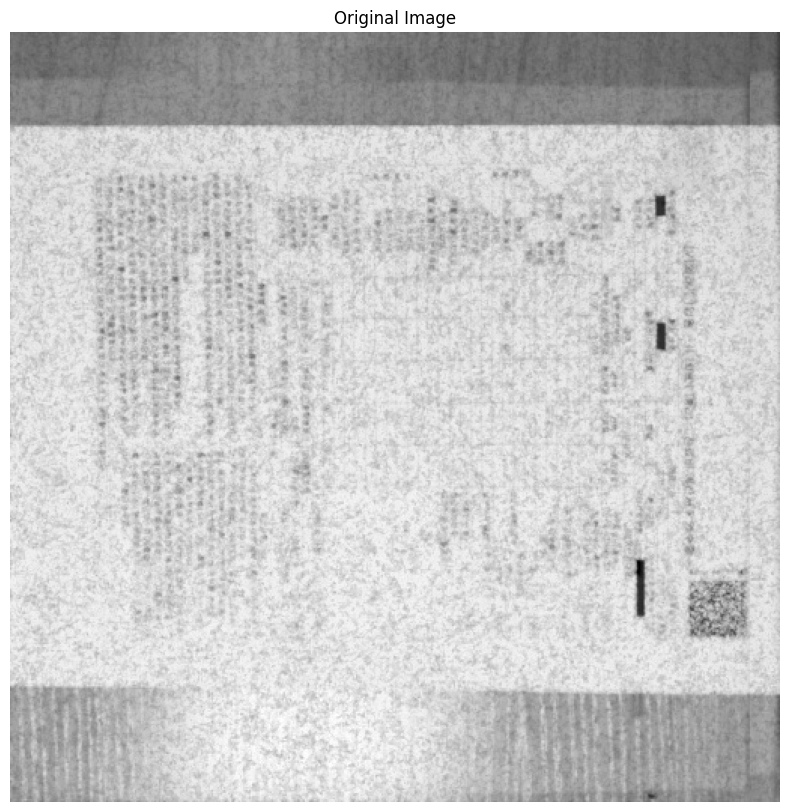

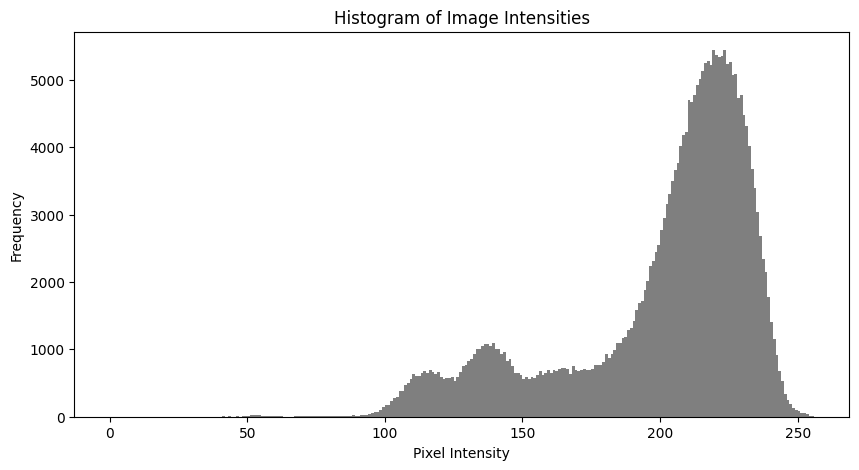

In [6]:
image_path = f'{data_path}/test/0b255faf6658e0fa.jpg'
image1 = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 10))
plt.imshow(image1, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(image1.ravel(), bins=256, range=[0, 256], color='black', alpha=0.5)
plt.title('Histogram of Image Intensities')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

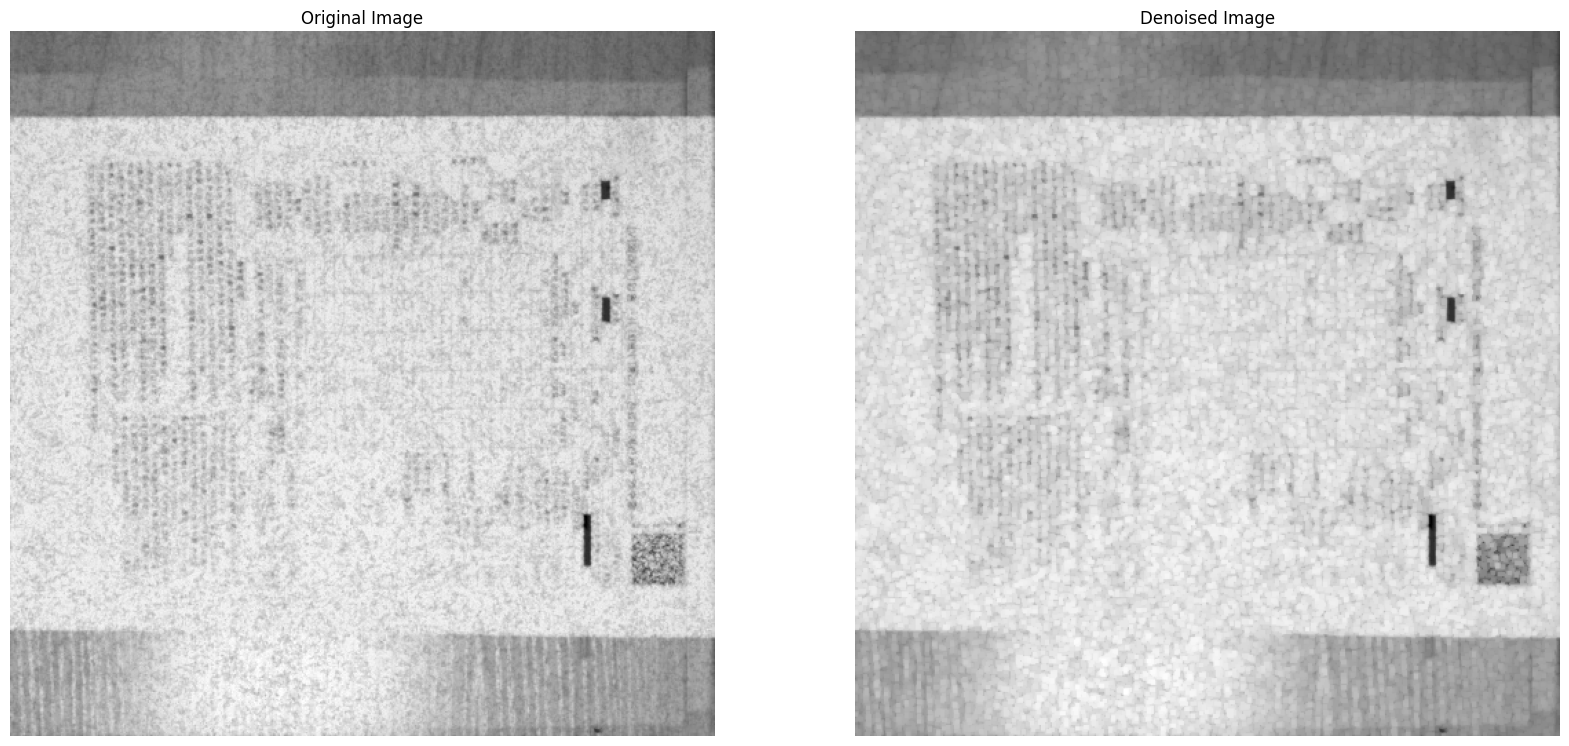

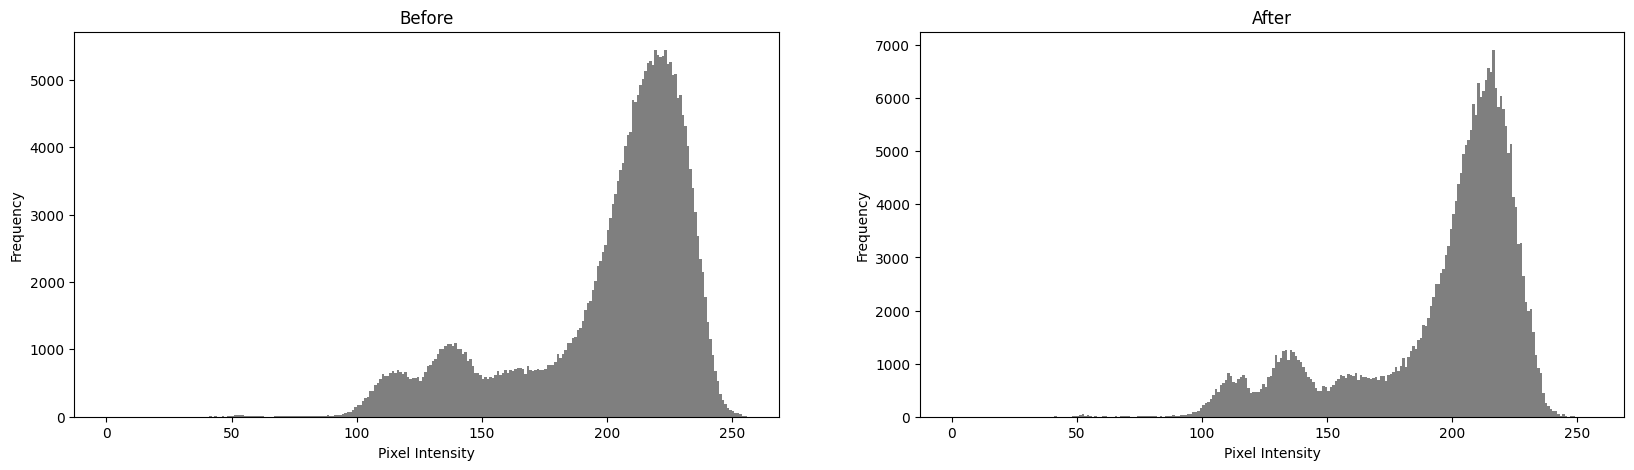

In [7]:
kernel = np.ones((3, 3), np.uint8)
opening_image = cv2.morphologyEx(image1, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(image1, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(opening_image, cmap='gray')
plt.title('Denoised Image')
plt.axis('off')

plt.show()


plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.hist(image1.ravel(), bins=256, range=[0, 256], color='black', alpha=0.5)
plt.title('Before')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(opening_image.ravel(), bins=256, range=[0, 256], color='black', alpha=0.5)
plt.title('After')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.show()

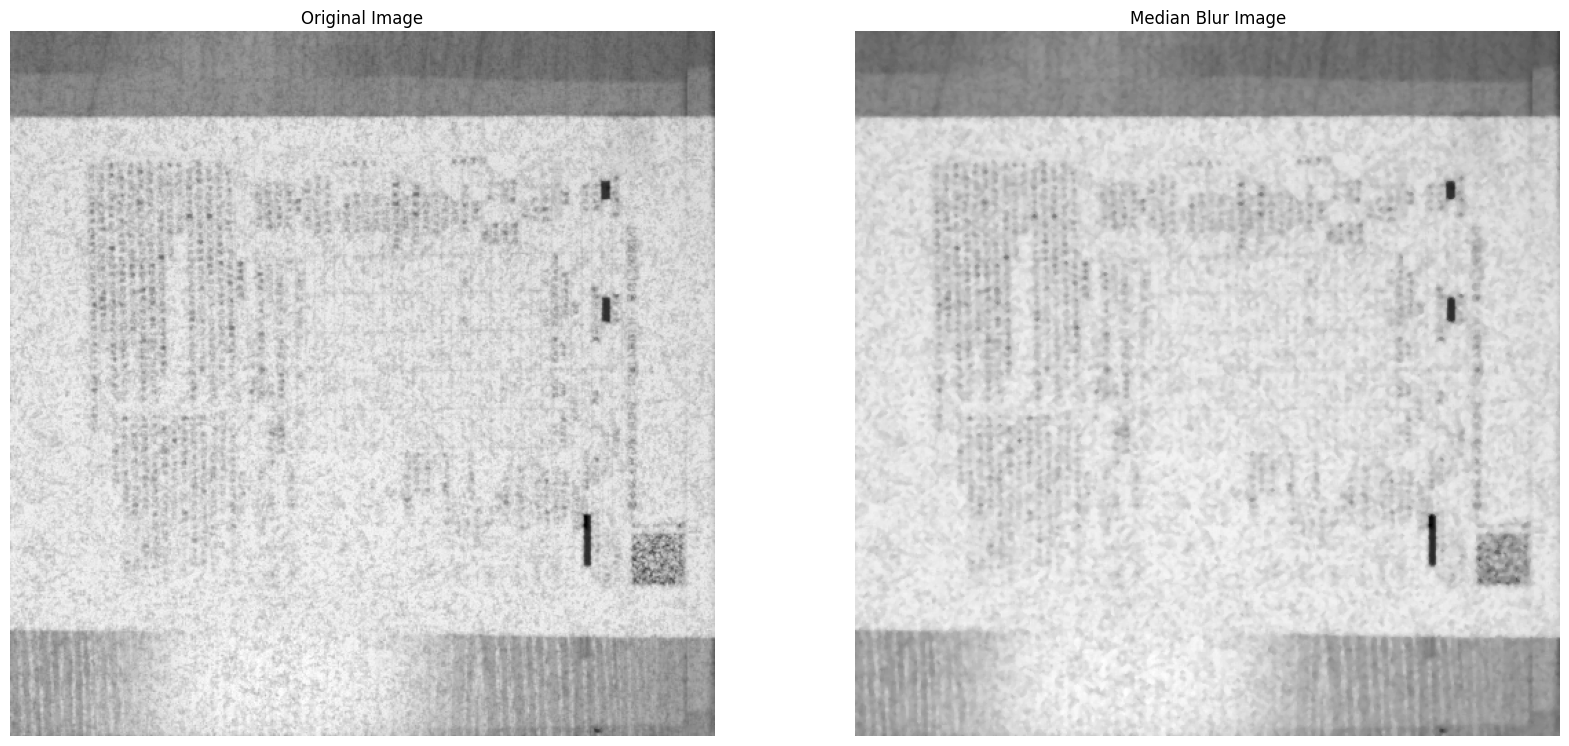

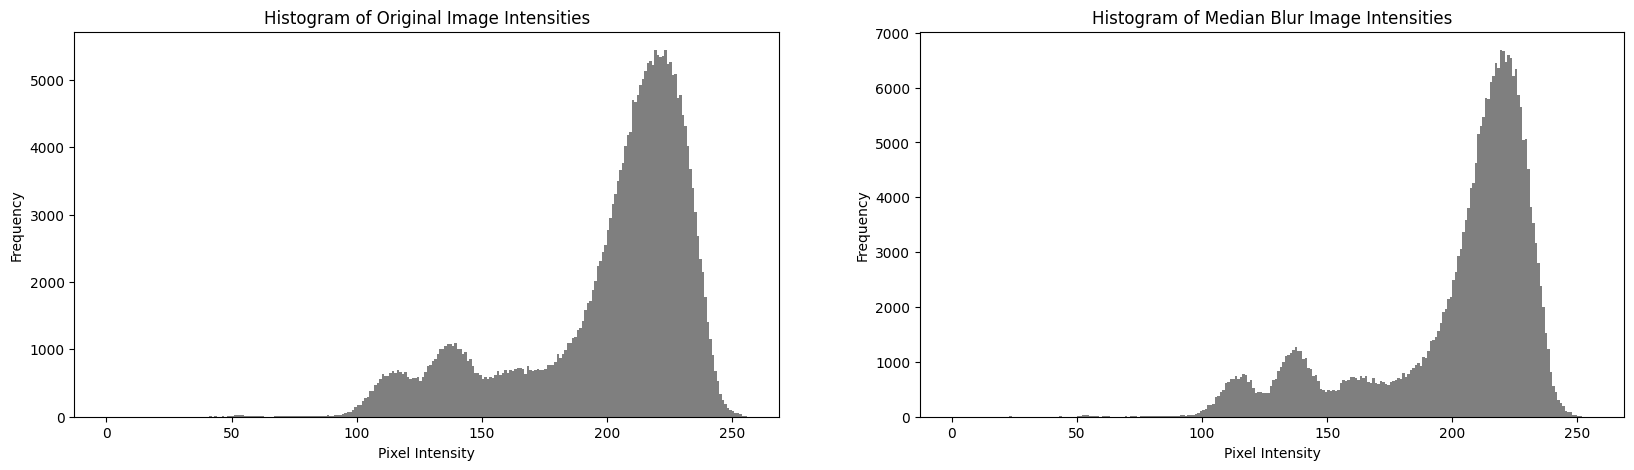

In [8]:
median_blur_image = cv2.medianBlur(image1, 3)

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(image1, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(median_blur_image, cmap='gray')
plt.title('Median Blur Image')
plt.axis('off')

plt.show()

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.hist(image1.ravel(), bins=256, range=[0, 256], color='black', alpha=0.5)
plt.title('Histogram of Original Image Intensities')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(median_blur_image.ravel(), bins=256, range=[0, 256], color='black', alpha=0.5)
plt.title('Histogram of Median Blur Image Intensities')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.show()

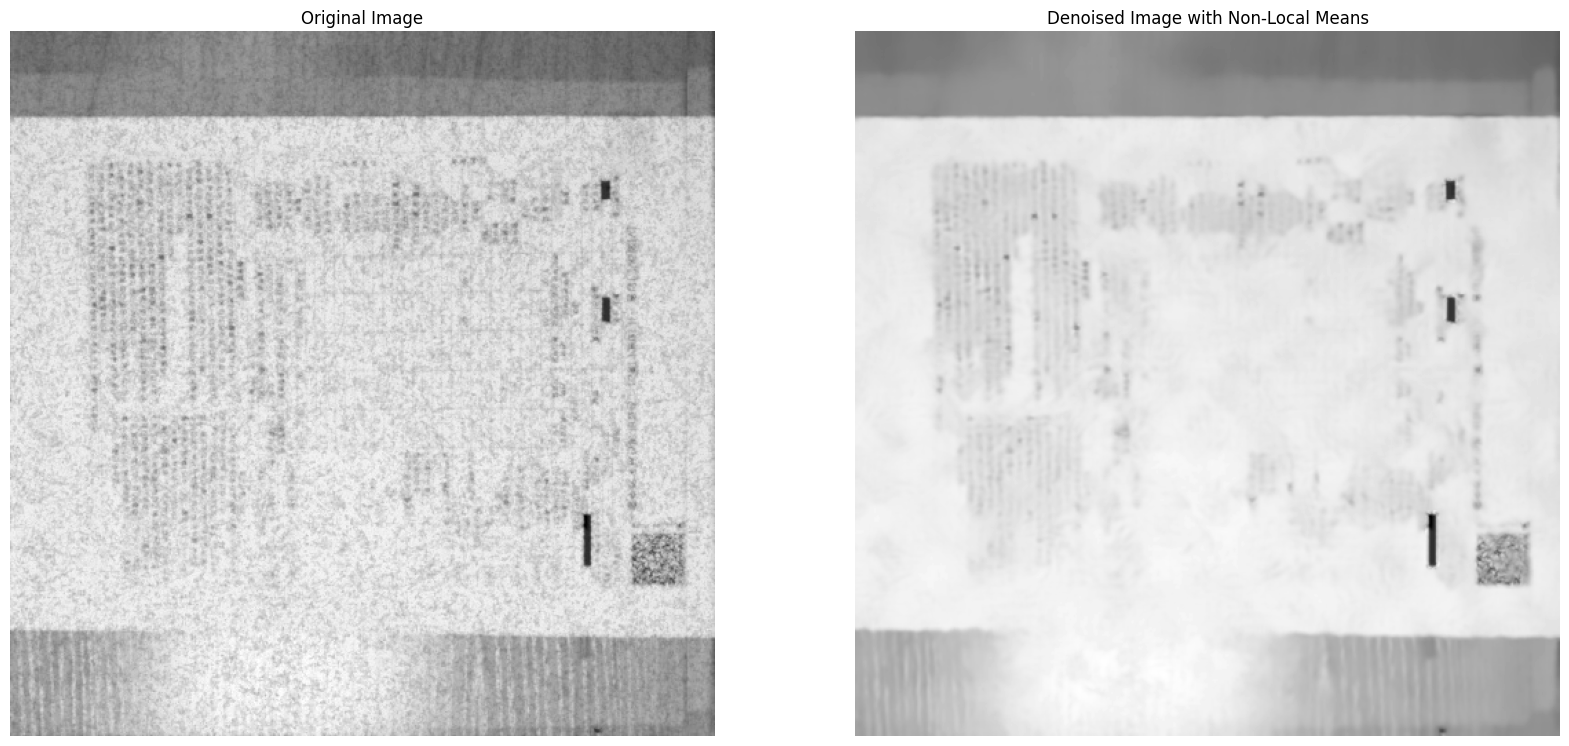

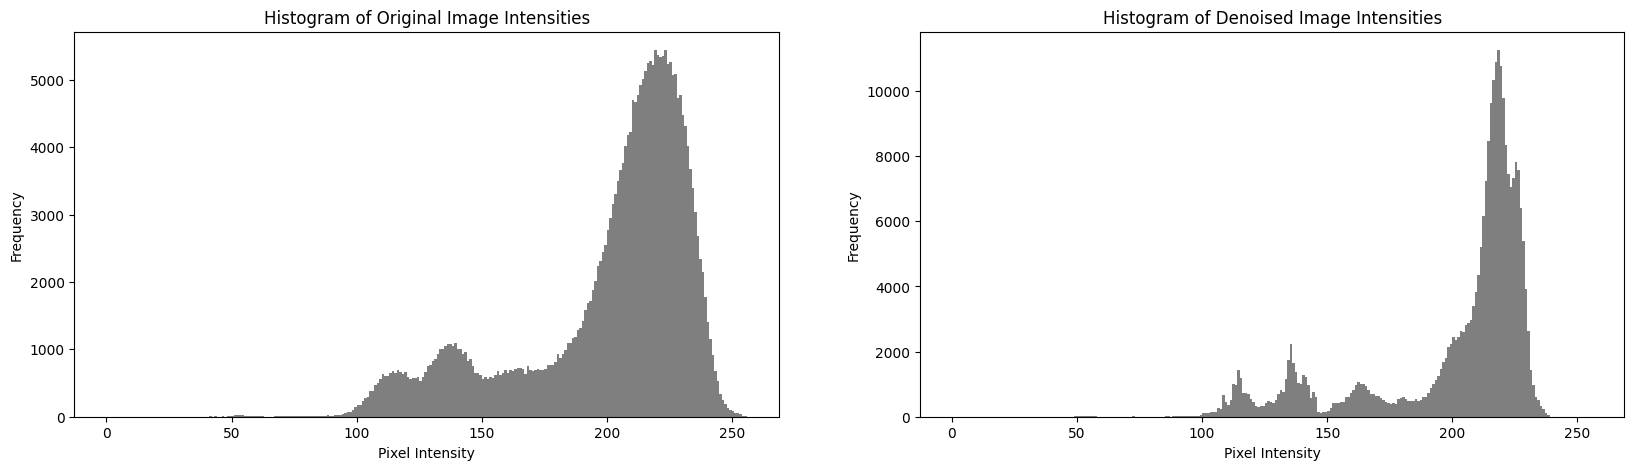

In [9]:
denoised_image = cv2.fastNlMeansDenoising(image1, None, 15, 7, 21)

# 결과 시각화
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(image1, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image with Non-Local Means')
plt.axis('off')

plt.show()

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.hist(image1.ravel(), bins=256, range=[0, 256], color='black', alpha=0.5)
plt.title('Histogram of Original Image Intensities')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(denoised_image.ravel(), bins=256, range=[0, 256], color='black', alpha=0.5)
plt.title('Histogram of Denoised Image Intensities')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.show()

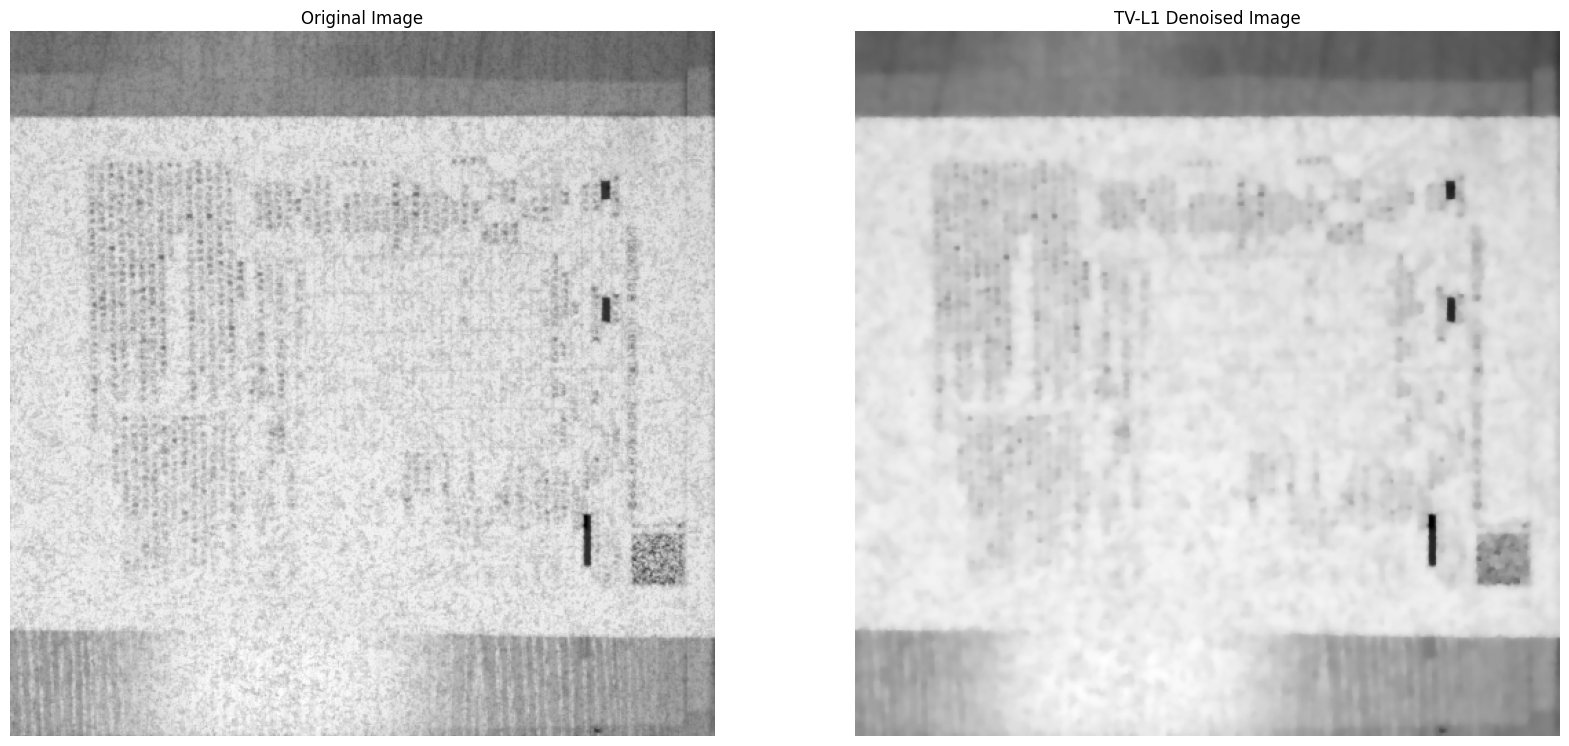

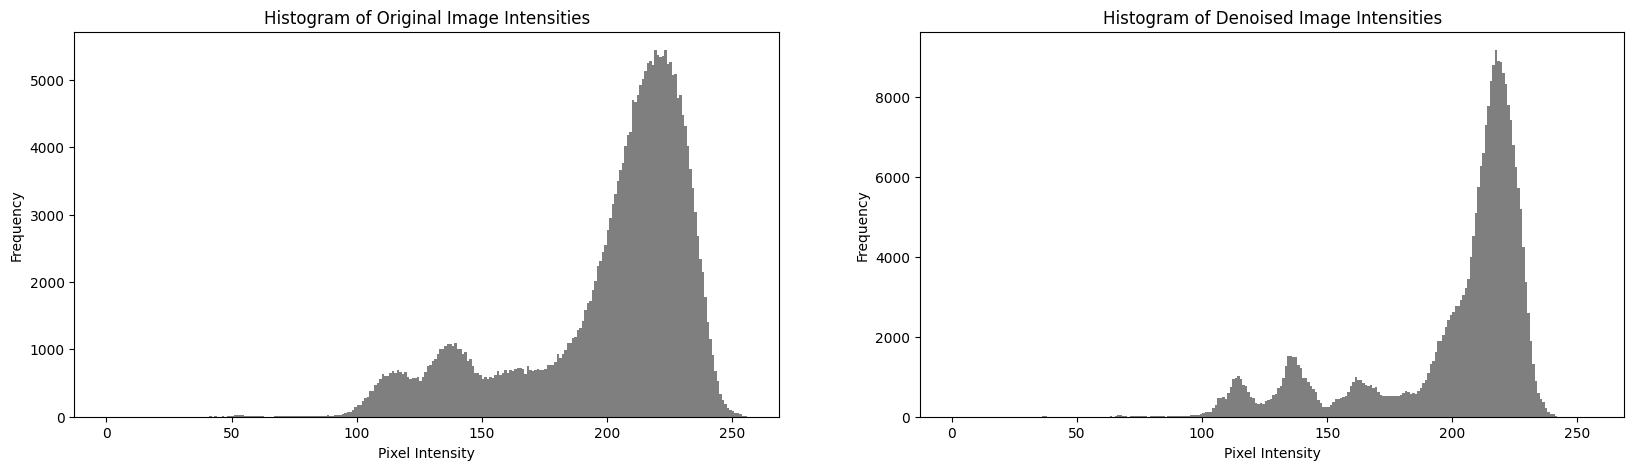

In [10]:
import skimage.restoration as restoration

tv_denoised_image = restoration.denoise_tv_chambolle(image1, weight=0.1)
tv_denoised_image = (tv_denoised_image * 255).astype(np.uint8)

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(image1, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(tv_denoised_image, cmap='gray')
plt.title('TV-L1 Denoised Image')
plt.axis('off')

plt.show()

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.hist(image1.ravel(), bins=256, range=[0, 256], color='black', alpha=0.5)
plt.title('Histogram of Original Image Intensities')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(tv_denoised_image.ravel(), bins=256, range=[0, 256], color='black', alpha=0.5)
plt.title('Histogram of Denoised Image Intensities')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.show()